# Yolov5 Prerequisite 

In [14]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 14461, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 14461 (delta 56), reused 53 (delta 25), pack-reused 14371
Receiving objects: 100% (14461/14461), 13.57 MiB | 9.62 MiB/s, done.
Resolving deltas: 100% (9957/9957), done.
/kaggle/working/yolov5
Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Loading Pretrained Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.classes = [0, 2]  # person and car

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-12-11 Python-3.7.12 torch-1.11.0+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# Pretrained-Model on Sample Data

In [6]:
img = 'I:/car-person-v2-roboflow/Car-Person-v2-Roboflow-Owais-Ahmad/test/images/image_000000102_jpg.rf.79e39dcbcd8179ea9e837ce05fb096a1.jpg'

# Inference
results = model(img)
results.print()  # or .show(), .save()

image 1/1: 416x416 5 persons, 2 cars
Speed: 72.7ms pre-process, 360.1ms inference, 15.9ms NMS per image at shape (1, 3, 640, 640)


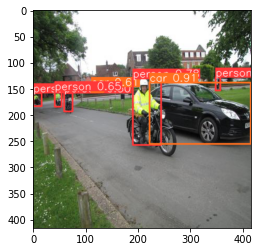

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

# Calculating Mean Difference

In [8]:
res = results.pandas().xyxy[0]
rn = {'car':'vehicle','person':'person'}
res['name'] = res['name'].map(rn)

In [9]:
def midpoint(xmin, ymin, xmax, ymax):
  center_w = xmax - xmin
  center_h = ymax - ymin
  center_x = 0.5*(xmin + xmax)
  center_y = 0.5*(ymin + ymax)
  return (center_x, center_y)
center = []
for i in range(4):
  center.append(midpoint(res['xmin'][i], res['ymin'][i], res['xmax'][i], res['ymax'][i]))
distance = pow(pow((center[0][0]-center[1][0]),2) + pow((center[0][1]-center[1][1]),2),0.5) 
  

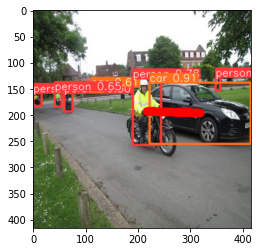

In [13]:
image = np.squeeze(results.render())
window_name = 'Image'
start_point = (int(center[0][0]), int(center[0][1]))

end_point = (int(center[1][0]), int(center[1][1]))

# Blue color in BGR
color = (255, 0, 0)
# Line thickness 
thickness = 15
label = str(int(distance))
text_org = (int(center[0][0] + 200) , int(center[0][1]) - 50)
image = cv2.line(image, start_point, end_point, color, thickness)
image = cv2.putText(image, label, text_org, cv2.FONT_HERSHEY_SIMPLEX, 10, color, 12,  cv2.LINE_AA)
# Displaying the image 
plt.imshow(image)
plt.show()